In [2]:
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

In [47]:
(train_images , train_labels),(test_images, test_labels)=keras.datasets.mnist.load_data()

In [49]:
print(train_images.shape)
print(train_labels)
print(test_labels)
print(test_images.shape)

(60000, 28, 28)
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]
(10000, 28, 28)


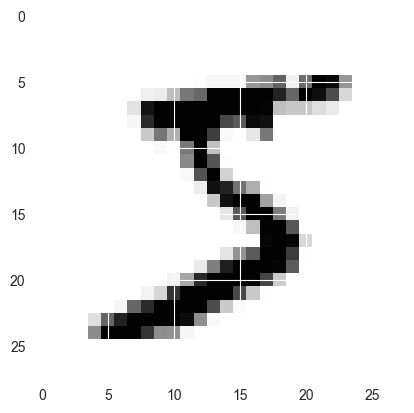

In [50]:
plt.imshow(train_images[0],cmap='Greys')

In [51]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(512,activation='relu',input_shape=(784,)))
model.add(keras.layers.Dense(10,activation='sigmoid'))

In [52]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

In [53]:
train_images = train_images.reshape((60000,784))
train_images = train_images.astype('float32')/255.0

test_images = test_images.reshape((10000,784))
test_images = test_images.astype('float32')/255.0

In [54]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [56]:
model.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0256 - accuracy: 0.8719
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0130 - accuracy: 0.9310
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0102 - accuracy: 0.9455
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0086 - accuracy: 0.9546
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0074 - accuracy: 0.9607


In [57]:
test_loss , test_acc =model.evaluate(test_images,test_labels)
print('테스트 정확도 :',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0071 - accuracy: 0.9628
테스트 정확도 : 0.9628000259399414


In [58]:
history = model.fit(train_images,train_labels,epochs=5,batch_size=128)


Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0066 - accuracy: 0.9659
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0060 - accuracy: 0.9698
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0054 - accuracy: 0.9730
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0050 - accuracy: 0.9751
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0046 - accuracy: 0.9774


TypeError: 'dict' object is not callable

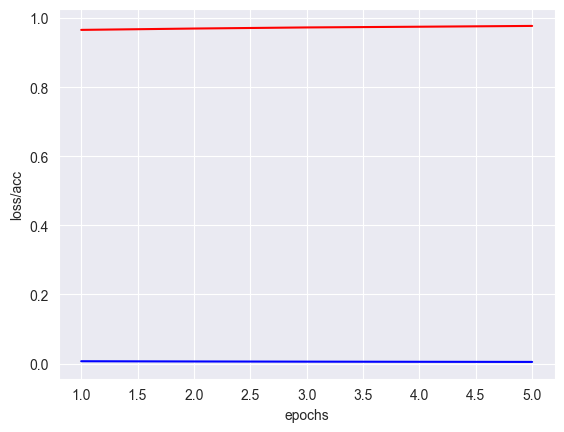

In [61]:
loss = history.history['loss']
acc =history.history['accuracy']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,acc,'r',label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()

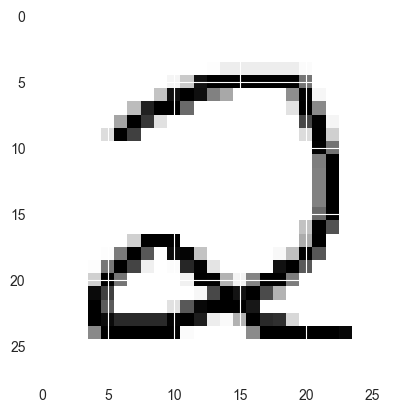

In [77]:
import cv2 as cv
image = cv.imread('../../data/Machine_Learning/test.png')
image = image[:,:,0]
image = cv.resize(image,(28,28))
image = image.astype('float32')
image = image.reshape(1,28*28)
image = 255-image
image/=255.0
plt.imshow(image.reshape(28,28),cmap='Greys')
plt.show()

In [73]:
pred = model.predict(image.reshape(1,784),batch_size=1)
print('추정된 숫자 = ',pred.argmax())

1/1 [==============================] - 0s 110ms/step
추정된 숫자 =  2
